In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import cv2
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils import to_categorical
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten,Dense, Dropout
from keras.models import Model

Using TensorFlow backend.


In [3]:
def import_images(directory, label_present = True):
    size = (150, 150)
    Images = []
    if label_present == True:
        Labels = []
        class_names = os.listdir(directory)
        class_labels = {classname : i for i, classname in enumerate(class_names)}
        for folder in os.listdir(directory):
            label = class_labels[folder]
            for file in os.listdir(os.path.join(directory, folder)):
                img_path = os.path.join(os.path.join(directory, folder), file)
                img_file = cv2.imread(img_path)
                img_file = cv2.resize(img_file, size)
                Images.append(img_file)
                Labels.append(label)
        return shuffle(Images, Labels, random_state = 21)
    else:
        for file in os.listdir(directory):
            img_path = os.path.join(directory, file)
            img_file = cv2.imread(img_path)
            img_file = cv2.resize(img_file, size)
            Images.append(img_file)
        return Images

In [4]:
xtrain, ytrain = import_images('/kaggle/input/intel-image-classification/seg_train/seg_train')
xval, yval = import_images('/kaggle/input/intel-image-classification/seg_test/seg_test')

In [5]:
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
xval = np.array(xval)
yval = np.array(yval)

In [6]:
xtrain.shape, ytrain.shape, xval.shape, yval.shape

((14034, 150, 150, 3), (14034,), (3000, 150, 150, 3), (3000,))

In [7]:
ytrain = to_categorical(ytrain, num_classes = 6)
yval = to_categorical(yval, num_classes = 6)
ytrain.shape, yval.shape

((14034, 6), (3000, 6))

In [8]:
xtrain = xtrain/255
xval = xval/255

In [9]:
def nature_model(input_shape):
    X_input = Input(input_shape)
    X = Conv2D(16, (3,3), strides = (1,1), padding = 'same', name = 'Conv1')(X_input)
    X = BatchNormalization(axis = 3, name = 'BN1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)
    X = Conv2D(16, (3,3), strides = (1,1), padding = 'valid', name = 'Conv2')(X)
    X = BatchNormalization(axis = 3, name = 'BN2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)
    X = Conv2D(32, (3,3), strides = (1,1), padding = 'same', name = 'Conv3')(X)
    X = BatchNormalization(axis = 3, name = 'BN3')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)
    X = Conv2D(32, (3,3), strides = (1,1), padding = 'same', name = 'Conv4')(X)
    X = BatchNormalization(axis = 3, name = 'BN')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)
    X = Conv2D(64, (3,3), strides = (1,1), padding = 'same', name = 'Conv5')(X)
    X = BatchNormalization(axis = 3, name = 'BN5')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)
    X = Conv2D(64, (3,3), strides = (1,1), padding = 'same', name = 'Conv6')(X)
    X = BatchNormalization(axis = 3, name = 'BN6')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)
    X = Flatten()(X)
    X = Dropout(0.5)(X)
    X = Dense(516, activation = 'relu', name = 'FC1')(X)
    X = Dense(128, activation = 'relu', name = 'FC2')(X)
    X = Dense(6, activation = 'softmax')(X)
    model = Model(inputs = X_input, outputs = X)
    return model

In [10]:
nt = nature_model(xtrain.shape[1:])

In [11]:
nt.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 150, 150, 16)      448       
_________________________________________________________________
BN1 (BatchNormalization)     (None, 150, 150, 16)      64        
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 73, 73, 16)        2320      
_________________________________________________________________
BN2 (BatchNormalization)     (None, 73, 73, 16)        64  

In [12]:
nt.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
history = nt.fit(x  = xtrain, y = ytrain, epochs = 30, validation_split = 0.2)

Train on 11227 samples, validate on 2807 samples
Epoch 1/30
11227/11227 [==============================] - 192s 17ms/step - loss: 0.9801 - accuracy: 0.6172 - val_loss: 1.4739 - val_accuracy: 0.4966
Epoch 2/30
11227/11227 [==============================] - 181s 16ms/step - loss: 0.6879 - accuracy: 0.7468 - val_loss: 1.0026 - val_accuracy: 0.6573
Epoch 3/30
11227/11227 [==============================] - 181s 16ms/step - loss: 0.5769 - accuracy: 0.7936 - val_loss: 0.6248 - val_accuracy: 0.7741
Epoch 4/30
11227/11227 [==============================] - 183s 16ms/step - loss: 0.5142 - accuracy: 0.8170 - val_loss: 3.7138 - val_accuracy: 0.2786
Epoch 5/30
11227/11227 [==============================] - 181s 16ms/step - loss: 0.4891 - accuracy: 0.8237 - val_loss: 0.5956 - val_accuracy: 0.7959
Epoch 6/30
11227/11227 [==============================] - 183s 16ms/step - loss: 0.4560 - accuracy: 0.8388 - val_loss: 0.4843 - val_accuracy: 0.8187
Epoch 7/30
11227/11227 [==============================] -

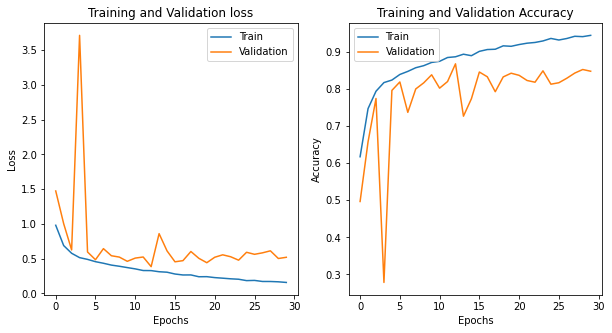

In [14]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Validation')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [15]:
val_pred = nt.evaluate(x= xval, y = yval)
print('Validation loss: ', val_pred[0])
print('Validation accuracy: ', val_pred[1])

3000/3000 [==============================] - 16s 5ms/step
Validation loss:  0.498337273200353
Validation accuracy:  0.8529999852180481


In [17]:
test = import_images('/kaggle/input/intel-image-classification/seg_pred/seg_pred', label_present = False)

In [18]:
test = np.array(test)
test.shape

(7301, 150, 150, 3)

In [19]:
test = test/255

In [20]:
test_pred = nt.predict(test)

In [25]:
test_labels = np.argmax(test_pred, axis = 1)

In [21]:
names = os.listdir('/kaggle/input/intel-image-classification/seg_train/seg_train')
lbls = {cls : i for i, cls in enumerate(names)}

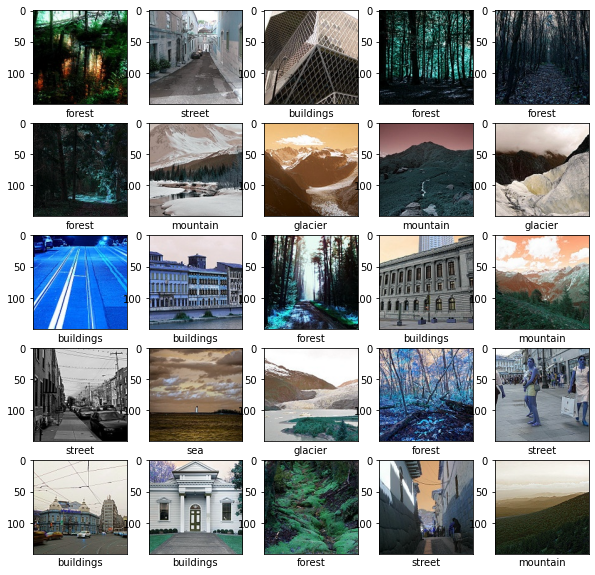

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.imshow(test[i], cmap = plt.cm.binary)
    plt.xlabel(names[test_labels[i]])
plt.show()